## Importing libraries

In [5]:
import os
from dotenv import load_dotenv
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
load_dotenv();

In [ ]:
client = pymongo.MongoClient(os.environ["MONGO_HOST"])
db = client["hotels"]
hotels_col = db["hotels"]
ratings_col = db["ratings"]

In [4]:
pipeline = [
    {"$unwind": "$amenities"},
    {"$group": {"_id": "$amenities", "count": {"$sum": 1}}}, 
    {"$sort": {"count": -1}}, 
    {"$limit": 15}
]

top_amenities = list(hotels_col.aggregate(pipeline))

for amenity in top_amenities:
    print(f"{amenity['_id']}: {amenity['count']}")

Non-smoking rooms: 2146
Air conditioning: 2110
Internet: 2022
English: 1993
Free Internet: 1980
Free Wifi: 1978
Wifi: 1942
Baggage Storage: 1817
Safe: 1813
24-Hour Front Desk: 1732
Flatscreen TV: 1717
Laundry Service: 1659
Restaurant: 1593
Breakfast Buffet: 1548
Bar/Lounge: 1545


In [6]:
filter_amenities = ["Non-smoking rooms", "Air conditioning", "Free Wifi", "Baggage Storage", "Safe", "24-Hour Front Desk", "Flatscreen TV", "Laundry Service", "Restaurant", "Breakfast Buffet"]

## Recommendation evaluation

In [3]:
cursor = ratings_col.find({}, {"Rating": 1, "CreatedAt": 1, "_id": 0})
df = pd.DataFrame(cursor)
df["CreatedAt"] = pd.to_datetime(df["CreatedAt"])

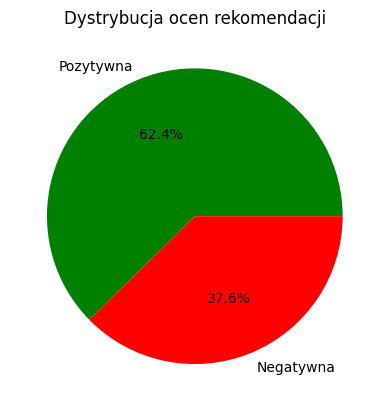

In [14]:
counts = df["Rating"].value_counts()
counts.plot.pie(autopct="%1.1f%%", labels=["Pozytywna", "Negatywna"], colors=["green", "red"])
plt.title("Dystrybucja ocen rekomendacji")
plt.ylabel("")
plt.show()